## Preamble

In [25]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df1 = pd.read_csv('OnlineNewsPopularity.csv')
df1.columns = df1.columns.str.strip()

#df2 = pd.read_csv('')

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


## Decision Tree

In [103]:
df = df1.copy()
del df['url']
del df['timedelta']

cols_name = df.columns
cols_name = cols_name[0:58]
scaler = MinMaxScaler()                          #for scaling
scaler.fit(df)                                   #for scaling
df =np.array(scaler.transform(df))               #for scaling

In [96]:
## Run this for Decision Trees########## without scaling
cols = df.shape[1]                                                         #Number of columns
df_X = df[cols_name]                                                      #Filter independent variables
df_y = df['shares']

#Train and test splits
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3, random_state = 2541)

mn = np.mean(y_train)
## We will classify anything more than 3rd quartile as high shares##
y_train = np.where(y_train > mn, 1, 0)
y_test = np.where(y_test > mn, 1, 0)

y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()

In [105]:
## Don't run this for Decision Tree############ with scaling
########################################
cols = df.shape[1]                                                         #Number of columns
df_X = df[:,0:cols-1]                                                      #Filter independent variables
df_y = df[:,cols-1:cols]

#Train and test splits
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3, random_state = 2531)

mn = np.mean(y_train)
## We will classify anything more than 3rd quartile as high shares##
y_train = np.where(y_train > mn, 1, 0)                  #For logistic regression
y_test = np.where(y_test > mn, 1, 0)                    #For logistic regression

y_train = np.array(y_train).flatten()                                     #For linear regression
y_test = np.array(y_test).flatten()                                       #For linear regression

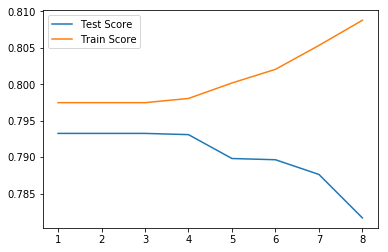

In [99]:
depths = [1, 2, 3, 4, 5, 6, 7, 8]#, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
scores_test = []
scores_train = []

for i in range(0, len(depths)):
    dtree = DecisionTreeClassifier(max_depth = depths[i], min_samples_split = 50, min_samples_leaf = 20, random_state = 245) # minimum 50 samples required to split the node
    dtree = dtree.fit(X_train, y_train)
    scores_test.append(dtree.score(X_test, y_test))
    scores_train.append(dtree.score(X_train, y_train))

plt.plot(depths, scores_test)
plt.plot(depths, scores_train)
plt.legend(['Test Score', 'Train Score'])

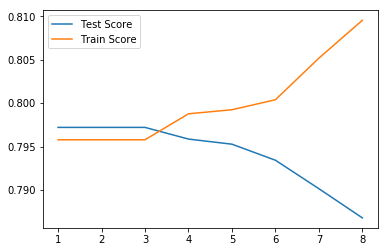

In [108]:
depths = [1, 2, 3, 4, 5, 6, 7, 8]#, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
scores_test = []
scores_train = []

for i in range(0, len(depths)):
    dtree = DecisionTreeClassifier(max_depth = depths[i], min_samples_split = 50, min_samples_leaf = 20, random_state = 245) # minimum 50 samples required to split the node
    dtree = dtree.fit(X_train, y_train)
    scores_test.append(dtree.score(X_test, y_test))
    scores_train.append(dtree.score(X_train, y_train))

plt.plot(depths, scores_test)
plt.plot(depths, scores_train)
plt.legend(['Test Score', 'Train Score'])

In [100]:
## Without Scaling
#######################
dtree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 50, min_samples_leaf = 20, random_state = 234)
dtree = dtree.fit(X_train, y_train)

tree.export_graphviz(dtree, out_file='dtree.dot')

# Due to issue in python anaconda environment, we used below command line to convert '.dot' file into .png image of the tree
# cmd line: dot -Tpng dtree.dot -o dtree.png

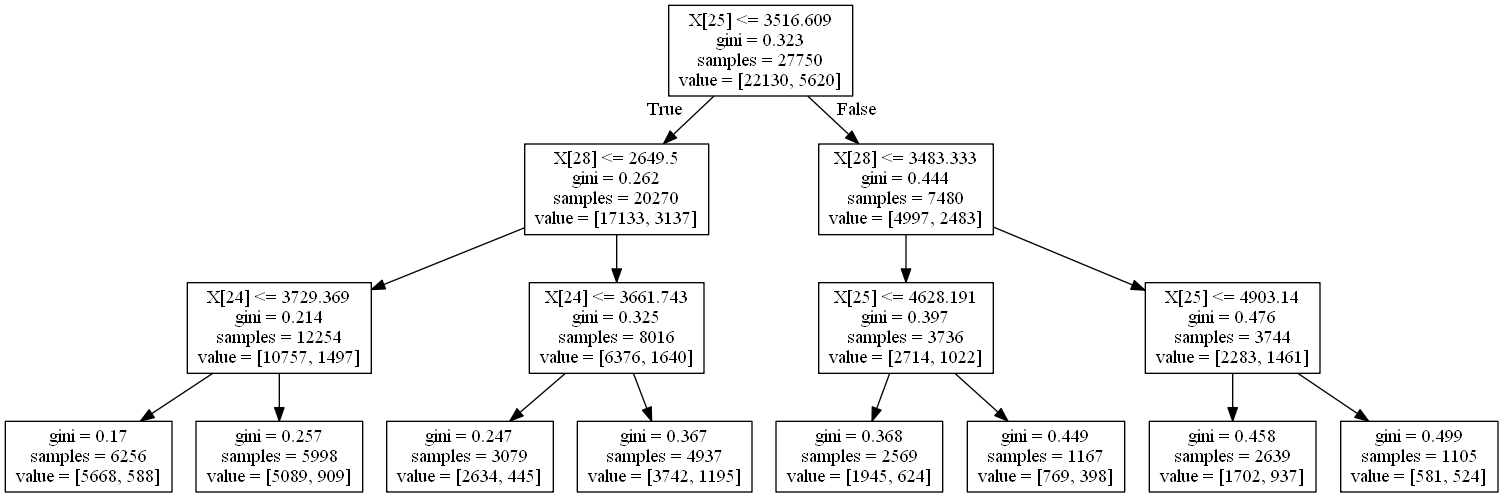

In [101]:
Image('dtree.png')

In [109]:
## With Scaling
##############################

dtree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 50, min_samples_leaf = 20, random_state = 234)
dtree = dtree.fit(X_train, y_train)

tree.export_graphviz(dtree, out_file='dtree.dot')

# Due to issue in python anaconda environment, we used below command line to convert '.dot' file into .png image of the tree
# cmd line: dot -Tpng dtree.dot -o dtree.png

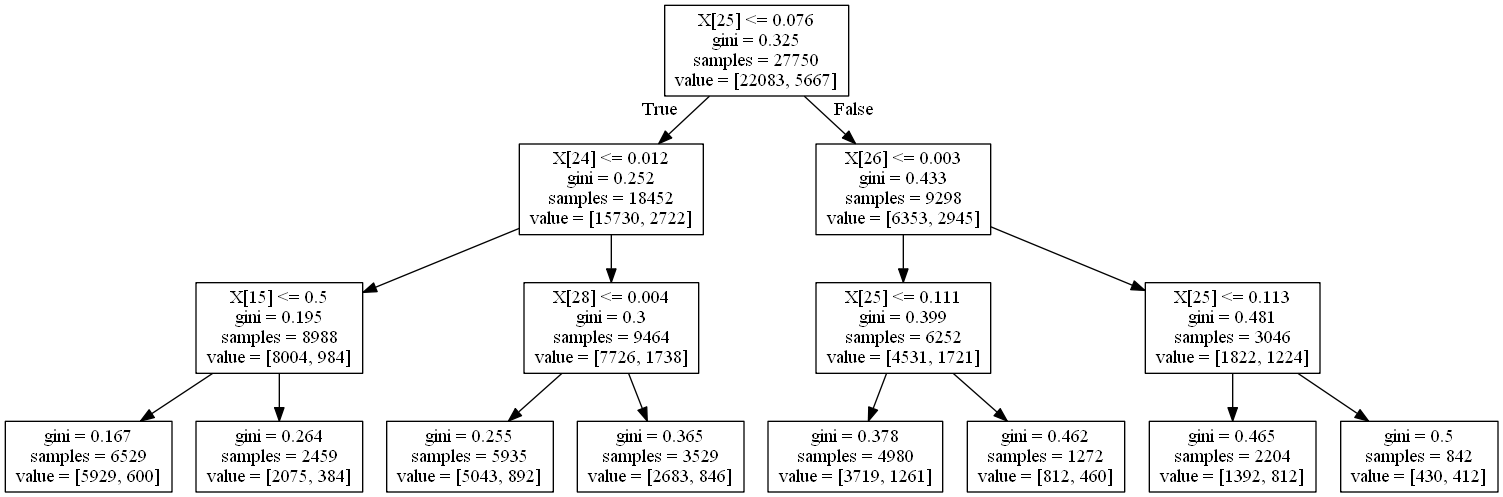

In [110]:
Image('dtree.png')

In [43]:
# Feel free to change the numbers and validate
test1 = X_test[10]
test2 = X_test[12]
test3 = X_test[30]
test4 = X_test[40]
test5 = X_test[25]

print('Pridicted Classification: {} || Actual Classification: {}'.format(dtree.predict([test1]), y_test[10]))
print('Pridicted Classification: {} || Actual Classification: {}'.format(dtree.predict([test2]), y_test[12]))
print('Pridicted Classification: {} || Actual Classification: {}'.format(dtree.predict([test3]), y_test[30]))
print('Pridicted Classification: {} || Actual Classification: {}'.format(dtree.predict([test4]), y_test[40]))
print('Pridicted Classification: {} || Actual Classification: {}'.format(dtree.predict([test5]), y_test[25]))

Pridicted Classification: [0] || Actual Classification: 0
Pridicted Classification: [0] || Actual Classification: 0
Pridicted Classification: [0] || Actual Classification: 0
Pridicted Classification: [0] || Actual Classification: 0
Pridicted Classification: [0] || Actual Classification: 0


## Support Vector Machine
The reason we used decision tree first is so that we can use only those features which have high gini index for the SVM

We will use attributes upto third branch of the tree, which are:
- X[25]:kw_avg_avg 
- x[24]:
- x[26]:
- x[28]:
- x[15]:

In [5]:
df = df1.copy()
del df['url']
del df['timedelta']

scaler = MinMaxScaler()
scaler.fit(df)
df =np.array(scaler.transform(df))

In [14]:
cols = df.shape[1]                                                         #Number of columns
df_X = df[:,0:cols-1]                                                      #Filter independent variables
df_y = df[:,cols-1:cols]

#Train and test splits
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3, random_state = 2531)

## We will classify anything more than 3rd quartile as high shares##
y_train = np.where(y_train > np.mean(y_train), 1, 0)                   #For logistic regression
y_test = np.where(y_test > np.mean(y_train), 1, 0)                     #For logistic regression

y_train = np.array(y_train).flatten()                                     #For linear regression
y_test = np.array(y_test).flatten()                                       #For linear regression

In [11]:
# Traing SVC
clf_svc_lin = svm.SVC(kernel='linear')
clf_svc_lin.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

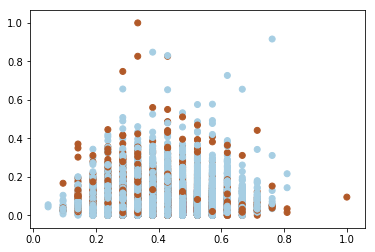

In [24]:
plt.clf()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

# Circle out the test data
#plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
#                zorder=10, edgecolor='k')
